In [32]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

## **Goal**

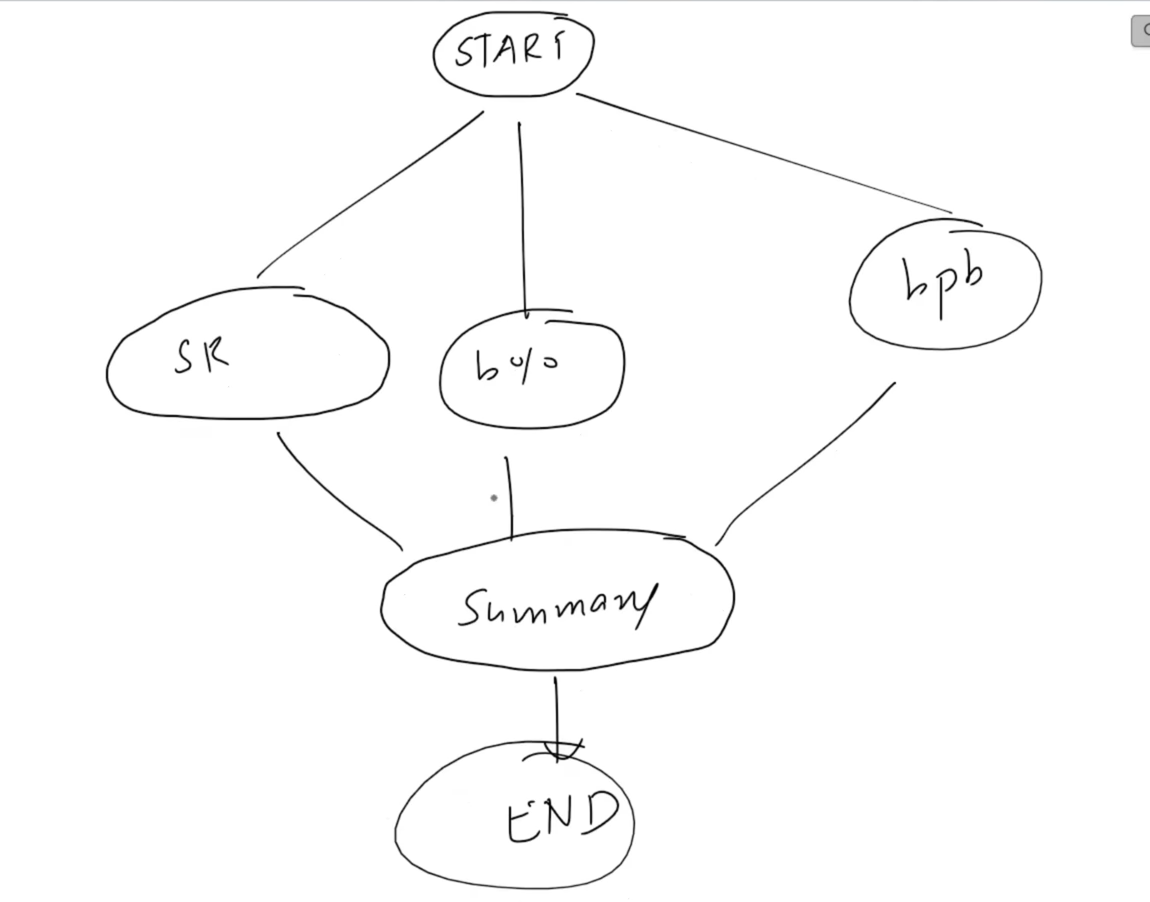

In [7]:
class BatsmetState(TypedDict):
  run : int
  balls : int
  fours : int
  sixes : int

  sr : float
  bpb : float
  boundary_per : float
  summary : str




In [16]:
def calc_sr(state: BatsmetState) -> BatsmetState:
  
  #extact values
  runs = state["run"]
  balls = state["balls"]

  #calculate strike rate
  sr = (runs / balls) * 100

  return {"sr": sr}

In [17]:
def calc_bpb(state: BatsmetState) -> BatsmetState:
  
  #extact values
  balls = state["balls"]
  fours = state["fours"]
  sixes = state["sixes"]


  #calculate bpb
  bpb = balls / (fours + sixes)

  return {"bpb": bpb}

In [18]:
def calc_boundary_per(state: BatsmetState) -> BatsmetState:
  
  #extact values
  balls = state["balls"]
  fours = state["fours"]
  sixes = state['sixes']

  #calculate boundary percentage
  boundary_per = ((fours + sixes) / balls) * 100

  return {"boundary_per": boundary_per}

In [25]:
def summary(state: BatsmetState) -> BatsmetState:
  summary = f"""
  Strike Rate: {state['sr']:.2f}
  Balls Per Boundary: {state['bpb']:.2f}
  Boundary Percentage: {state['boundary_per']:.2f}"""

  return {"summary": summary}  

In [27]:
graph = StateGraph(BatsmetState)

graph.add_node("Calc Strike Rate",calc_sr)
graph.add_node("Calc Balls Per Boundary",calc_bpb)
graph.add_node("Calc Boundary Percentage",calc_boundary_per)
graph.add_node("Summary",summary)

graph.add_edge(START, "Calc Strike Rate")
graph.add_edge(START, "Calc Balls Per Boundary")
graph.add_edge(START, "Calc Boundary Percentage")

graph.add_edge("Calc Strike Rate", "Summary")
graph.add_edge("Calc Balls Per Boundary", "Summary")
graph.add_edge("Calc Boundary Percentage", "Summary")

graph.add_edge("Summary", END)

workflow = graph.compile()

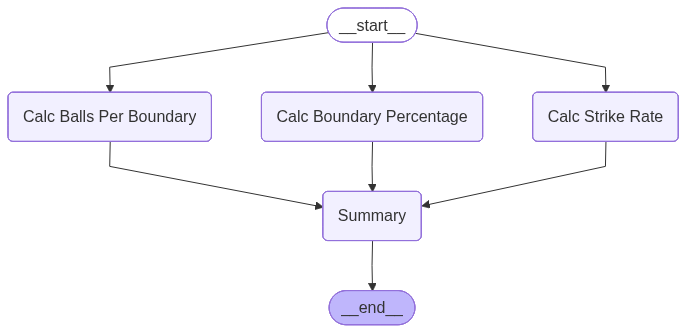

In [28]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [29]:
intial_state = {
  "run": 100,
  "balls": 50,
  "fours": 6,
  "sixes": 4
}

final_state = workflow.invoke(intial_state)

print(final_state)

{'run': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'boundary_per': 20.0, 'summary': '\n  Strike Rate: 200.00\n  Balls Per Boundary: 5.00\n  Boundary Percentage: 20.00'}


In [31]:
print(final_state["summary"])


  Strike Rate: 200.00
  Balls Per Boundary: 5.00
  Boundary Percentage: 20.00
